<a href="https://colab.research.google.com/github/anushkaxp/Gold-price-prediction/blob/main/Silver5years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import shutil
import datetime
import gc
from tqdm import tqdm
import plotly.express as px

import pandas as pd
import numpy as np
from numpy import median

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.manifold import TSNE
from sklearn import preprocessing

from collections import Counter

import string
import re
from nltk.corpus import stopwords

import scipy
from scipy import hstack


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score


from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.linear_model import Ridge

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [4]:
from google.colab import files
uploaded = files.upload()

Saving trading-statistics-jan-2018.xlsx to trading-statistics-jan-2018.xlsx
Saving trading-statistics-feb-2018.xlsx to trading-statistics-feb-2018.xlsx
Saving trading-statistics-mar-2018.xlsx to trading-statistics-mar-2018.xlsx
Saving trading-statistics-apr-2018.xlsx to trading-statistics-apr-2018.xlsx
Saving trading-statistics-may-2018.xlsx to trading-statistics-may-2018.xlsx
Saving trading-statistics-jul-2018.xlsx to trading-statistics-jul-2018.xlsx
Saving trading-statistics-aug-2018.xlsx to trading-statistics-aug-2018.xlsx
Saving trading-statistics-sep-2018.xlsx to trading-statistics-sep-2018.xlsx
Saving trading-statistics-oct-2018.xlsx to trading-statistics-oct-2018.xlsx
Saving trading-statistics-nov-2018.xlsx to trading-statistics-nov-2018.xlsx
Saving trading-statistics-jan-2019.xlsx to trading-statistics-jan-2019.xlsx
Saving trading-statistics-feb-2019.xlsx to trading-statistics-feb-2019.xlsx
Saving trading-statistics-mar-2019.xlsx to trading-statistics-mar-2019.xlsx
Saving tradi

In [5]:
path = os.getcwd()
files = os.listdir(path)
files

['.config',
 'trading-statistics-apr-2021.xlsx',
 'trading-statistics-aug-2021.xlsx',
 'trading-statistics-sep-2019.xlsx',
 'trading-statistics-feb-2022.xlsx',
 'trading-statistics (2).xlsx',
 'trading-statistics-feb-2021.xlsx',
 'trading-statistics-may-2018.xlsx',
 'trading-statistics-mar-2021.xlsx',
 'trading-statistics-aug-2022.xlsx',
 'trading-statistics-jan-2018.xlsx',
 'trading-statistics-may-2022.xlsx',
 'trading-statistics-oct-2019.xlsx',
 'trading-statistics-jan-2023.xlsx',
 'trading-statistics-june-2022.xlsx',
 'trading-statistics-feb-2018.xlsx',
 'trading-statistics-jul-2019.xlsx',
 'trading-statistics-jul-2018.xlsx',
 'trading-statistics-jan-2020.xlsx',
 'trading-statistics-december-2021.xlsx',
 'trading-statistics-sep-2018.xlsx',
 'trading-statistics-mar-2023.xlsx',
 'trading-statistics-jun-2021.xlsx',
 'trading-statistics-november-2022.xlsx',
 'trading-statistics-mar-2018.xlsx',
 'trading-statistics-dec-2019.xlsx',
 'trading-statistics-aug-2020.xlsx',
 'trading-statistics

In [6]:
files_xlsx = [f for f in files if f[-4:] == "xlsx"]
files_xlsx

['trading-statistics-apr-2021.xlsx',
 'trading-statistics-aug-2021.xlsx',
 'trading-statistics-sep-2019.xlsx',
 'trading-statistics-feb-2022.xlsx',
 'trading-statistics (2).xlsx',
 'trading-statistics-feb-2021.xlsx',
 'trading-statistics-may-2018.xlsx',
 'trading-statistics-mar-2021.xlsx',
 'trading-statistics-aug-2022.xlsx',
 'trading-statistics-jan-2018.xlsx',
 'trading-statistics-may-2022.xlsx',
 'trading-statistics-oct-2019.xlsx',
 'trading-statistics-jan-2023.xlsx',
 'trading-statistics-june-2022.xlsx',
 'trading-statistics-feb-2018.xlsx',
 'trading-statistics-jul-2019.xlsx',
 'trading-statistics-jul-2018.xlsx',
 'trading-statistics-jan-2020.xlsx',
 'trading-statistics-december-2021.xlsx',
 'trading-statistics-sep-2018.xlsx',
 'trading-statistics-mar-2023.xlsx',
 'trading-statistics-jun-2021.xlsx',
 'trading-statistics-november-2022.xlsx',
 'trading-statistics-mar-2018.xlsx',
 'trading-statistics-dec-2019.xlsx',
 'trading-statistics-aug-2020.xlsx',
 'trading-statistics-oct-2020.xl

In [7]:
df = pd.DataFrame()
for f in files_xlsx:
    data = pd.read_excel(f)
    df = df.append(data)

In [8]:

df

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaT,Equity Derivatives/ Currency Derivatives/ Inte...,Equity Index Future/ Stock Future/ Equity Inde...,NaN,NaN,NaT,NaN,Call Option/ Put Option,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALGO,Non-ALGO
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,April,2021-04-01,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-04-30,1 KGS,N.A.,...,181.15,-,2205104250,2479,1475,5 MT,1313856250,2309,40.803507,59.196493
4,2021,April,2021-04-01,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-05-31,1 KGS,N.A.,...,181.15,-,28389500,32,45,5 MT,40027500,31,34.38287,65.61713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5647,Note:,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5648,Contracts with no volume and no Open Interest ...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5649,Spot price is not provided in case of Option C...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.drop([0,1,2], axis = 0)

In [10]:
df

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
3,2021,April,2021-04-01,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-04-30,1 KGS,N.A.,...,181.15,-,2205104250,2479,1475,5 MT,1313856250,2309,40.803507,59.196493
4,2021,April,2021-04-01,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-05-31,1 KGS,N.A.,...,181.15,-,28389500,32,45,5 MT,40027500,31,34.38287,65.61713
5,2021,April,2021-04-01,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-04-30,1 KGS,N.A.,...,677.6,-,15277764625,9165,2717,2500 KGS,4546899500,8445,39.450045,60.549955
6,2021,April,2021-04-01,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-05-31,1 KGS,N.A.,...,677.6,-,236973625,142,102,2500 KGS,170824500,137,39.802979,60.197021
7,2021,April,2021-04-01,Commodity Derivatives,OPTFUT,COPPER,COPPER,2021-04-21,1 KGS,CE,...,-,-,-,-,1,2500 KGS,1731850,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5647,Note:,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5648,Contracts with no volume and no Open Interest ...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5649,Spot price is not provided in case of Option C...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.Symbol.describe()

count     332279
unique        33
top       SILVER
freq       62465
Name: Symbol, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332635 entries, 3 to 5650
Data columns (total 26 columns):
 #   Column                                                                    Non-Null Count   Dtype         
---  ------                                                                    --------------   -----         
 0   Year                                                                      332573 non-null  object        
 1   Month                                                                     332279 non-null  object        
 2   Date                                                                      332279 non-null  datetime64[ns]
 3   Derivative segment                                                        332279 non-null  object        
 4   Instrument Type                                                           332279 non-null  object        
 5   Name of the commodity                                                     332192 non-null  object        
 6 

In [13]:
df.describe().T.style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
Close Price (In Rs),332279.000000,4970.392571,13066.980943,0.010000,41.300000,349.100000,1924.500000,84120.000000
Clearing/Daily Settlement price,332279.000000,4971.261274,13065.974867,-2884.000000,44.350000,353.500000,1926.500000,84120.000000


In [14]:
df.fillna(value = 0,inplace = True)
print(df)

                                                   Year  Month  \
3                                                  2021  April   
4                                                  2021  April   
5                                                  2021  April   
6                                                  2021  April   
7                                                  2021  April   
...                                                 ...    ...   
5646                                                  0      0   
5647                                              Note:      0   
5648  Contracts with no volume and no Open Interest ...      0   
5649  Spot price is not provided in case of Option C...      0   
5650  In case of international referenceable commodi...      0   

                     Date     Derivative segment Instrument Type  \
3     2021-04-01 00:00:00  Commodity Derivatives          FUTCOM   
4     2021-04-01 00:00:00  Commodity Derivatives          FUTCOM   
5  

In [15]:
df

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
3,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-04-30 00:00:00,1 KGS,N.A.,...,181.15,-,2205104250,2479,1475,5 MT,1313856250,2309,40.803507,59.196493
4,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-05-31 00:00:00,1 KGS,N.A.,...,181.15,-,28389500,32,45,5 MT,40027500,31,34.38287,65.61713
5,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-04-30 00:00:00,1 KGS,N.A.,...,677.6,-,15277764625,9165,2717,2500 KGS,4546899500,8445,39.450045,60.549955
6,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-05-31 00:00:00,1 KGS,N.A.,...,677.6,-,236973625,142,102,2500 KGS,170824500,137,39.802979,60.197021
7,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2021-04-21 00:00:00,1 KGS,CE,...,-,-,-,-,1,2500 KGS,1731850,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5647,Note:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5648,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5649,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print('Shape of data: ', df.shape)

Shape of data:  (332635, 26)


In [17]:
df['Option Type']=df['Option Type'].replace('N.A.',0)
df.head(5)

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
3,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-04-30 00:00:00,1 KGS,0,...,181.15,-,2205104250,2479,1475,5 MT,1313856250,2309,40.803507,59.196493
4,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-05-31 00:00:00,1 KGS,0,...,181.15,-,28389500,32,45,5 MT,40027500,31,34.38287,65.61713
5,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-04-30 00:00:00,1 KGS,0,...,677.6,-,15277764625,9165,2717,2500 KGS,4546899500,8445,39.450045,60.549955
6,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-05-31 00:00:00,1 KGS,0,...,677.6,-,236973625,142,102,2500 KGS,170824500,137,39.802979,60.197021
7,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2021-04-21 00:00:00,1 KGS,CE,...,-,-,-,-,1,2500 KGS,1731850,-,-,-


In [18]:
df[df.duplicated()]

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
5074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5075,Note:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5076,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5077,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5078,In case of international referenceable commodi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5647,Note:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5648,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5649,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = df.columns.str.replace('[#,@,&,(,),-]', '')
df = df.replace('-',np.nan)
df = df.replace('',np.nan)
df.head(10)

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
3,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-04-30 00:00:00,1 KGS,0,...,181.15,NaN,2.205104e+09,2479.0,1475.0,5 MT,1.313856e+09,2309.0,40.803507,59.196493
4,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-05-31 00:00:00,1 KGS,0,...,181.15,NaN,2.838950e+07,32.0,45.0,5 MT,4.002750e+07,31.0,34.382870,65.617130
5,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-04-30 00:00:00,1 KGS,0,...,677.60,NaN,1.527776e+10,9165.0,2717.0,2500 KGS,4.546900e+09,8445.0,39.450045,60.549955
6,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-05-31 00:00:00,1 KGS,0,...,677.60,NaN,2.369736e+08,142.0,102.0,2500 KGS,1.708245e+08,137.0,39.802979,60.197021
7,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2021-04-21 00:00:00,1 KGS,CE,...,NaN,NaN,NaN,NaN,1.0,2500 KGS,1.731850e+06,NaN,NaN,NaN
8,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2021-04-21 00:00:00,1 KGS,CE,...,NaN,NaN,NaN,NaN,2.0,2500 KGS,3.481250e+06,NaN,NaN,NaN
9,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2021-04-21 00:00:00,1 KGS,CE,...,NaN,NaN,NaN,NaN,1.0,2500 KGS,1.759875e+06,NaN,NaN,NaN
10,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COTTON,COTTON,2021-04-30 00:00:00,1 BALES,0,...,21690.00,NaN,8.299610e+08,1550.0,7660.0,25 BALES,4.071290e+09,888.0,8.310180,91.689820
11,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COTTON,COTTON,2021-05-31 00:00:00,1 BALES,0,...,21690.00,NaN,7.870550e+07,145.0,519.0,25 BALES,2.794815e+08,120.0,43.489337,56.510663
12,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,CRUDE PALM OIL,CPO,2021-04-30 00:00:00,10 KGS,0,...,1147.30,NaN,3.621370e+09,3312.0,5892.0,10 MT,6.424048e+09,2045.0,12.712075,87.287925


In [20]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = df.columns.str.replace('[#,@,&,(,),-]', '')
df = df.replace('-',np.nan)
df = df.replace('',np.nan)
df.head(10)

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
3,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-04-30 00:00:00,1 KGS,0,...,181.15,NaN,2.205104e+09,2479.0,1475.0,5 MT,1.313856e+09,2309.0,40.803507,59.196493
4,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-05-31 00:00:00,1 KGS,0,...,181.15,NaN,2.838950e+07,32.0,45.0,5 MT,4.002750e+07,31.0,34.382870,65.617130
5,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-04-30 00:00:00,1 KGS,0,...,677.60,NaN,1.527776e+10,9165.0,2717.0,2500 KGS,4.546900e+09,8445.0,39.450045,60.549955
6,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-05-31 00:00:00,1 KGS,0,...,677.60,NaN,2.369736e+08,142.0,102.0,2500 KGS,1.708245e+08,137.0,39.802979,60.197021
7,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2021-04-21 00:00:00,1 KGS,CE,...,NaN,NaN,NaN,NaN,1.0,2500 KGS,1.731850e+06,NaN,NaN,NaN
8,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2021-04-21 00:00:00,1 KGS,CE,...,NaN,NaN,NaN,NaN,2.0,2500 KGS,3.481250e+06,NaN,NaN,NaN
9,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,COPPER,COPPER,2021-04-21 00:00:00,1 KGS,CE,...,NaN,NaN,NaN,NaN,1.0,2500 KGS,1.759875e+06,NaN,NaN,NaN
10,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COTTON,COTTON,2021-04-30 00:00:00,1 BALES,0,...,21690.00,NaN,8.299610e+08,1550.0,7660.0,25 BALES,4.071290e+09,888.0,8.310180,91.689820
11,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COTTON,COTTON,2021-05-31 00:00:00,1 BALES,0,...,21690.00,NaN,7.870550e+07,145.0,519.0,25 BALES,2.794815e+08,120.0,43.489337,56.510663
12,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,CRUDE PALM OIL,CPO,2021-04-30 00:00:00,10 KGS,0,...,1147.30,NaN,3.621370e+09,3312.0,5892.0,10 MT,6.424048e+09,2045.0,12.712075,87.287925


In [21]:
corr = df.corr()
corr.style.background_gradient(cmap = "copper")

,Open_Price_In_Rs,High_Price_In_Rs,Low_Price_In_Rs,Close_Price_In_Rs,Clearing/Daily_Settlement_price,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_ In_Lots,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
Open_Price_In_Rs,1.000000,0.999906,0.999902,0.999874,0.999874,0.930145,-0.066671,0.186262,0.140433,0.357819,0.359273,0.192011,-0.111851,0.072786
High_Price_In_Rs,0.999906,1.000000,0.999820,0.999920,0.999919,0.930291,-0.063414,0.186794,0.141085,0.357807,0.358975,0.192945,-0.111055,0.071374
Low_Price_In_Rs,0.999902,0.999820,1.000000,0.999928,0.999928,0.930008,-0.068561,0.185444,0.139582,0.357633,0.359628,0.190754,-0.112649,0.074137
Close_Price_In_Rs,0.999874,0.999920,0.999928,1.000000,0.999851,0.900438,-0.066634,0.186121,0.140364,0.346168,0.346222,0.191891,-0.111801,0.072732
Clearing/Daily_Settlement_price,0.999874,0.999919,0.999928,0.999851,1.000000,0.900439,-0.066633,0.186120,0.140360,0.346178,0.346237,0.191887,-0.111804,0.072730
Spot_Price_for_basis_variety_in_Rs*,0.930145,0.930291,0.930008,0.900438,0.900439,1.000000,0.137143,0.059025,0.015281,0.198782,0.251855,0.053256,0.142205,-0.102248
Premium_Turnover_in_Rs,-0.066671,-0.063414,-0.068561,-0.066634,-0.066633,0.137143,1.000000,0.841549,0.835952,0.507948,0.276650,0.872234,0.059993,-0.116193
Notional_Turnover___Options/_Turnover_Futures_in_Rs,0.186262,0.186794,0.185444,0.186121,0.186120,0.059025,0.841549,1.000000,0.574543,0.284142,0.481346,0.660835,0.016981,-0.084585
Trading_Volume_In_Lots,0.140433,0.141085,0.139582,0.140364,0.140360,0.015281,0.835952,0.574543,1.000000,0.513855,0.098311,0.961574,-0.017115,-0.034339
Open_Interest_ In_Lots,0.357819,0.357807,0.357633,0.346168,0.346178,0.198782,0.507948,0.284142,0.513855,1.000000,0.287453,0.526008,-0.119947,0.048765


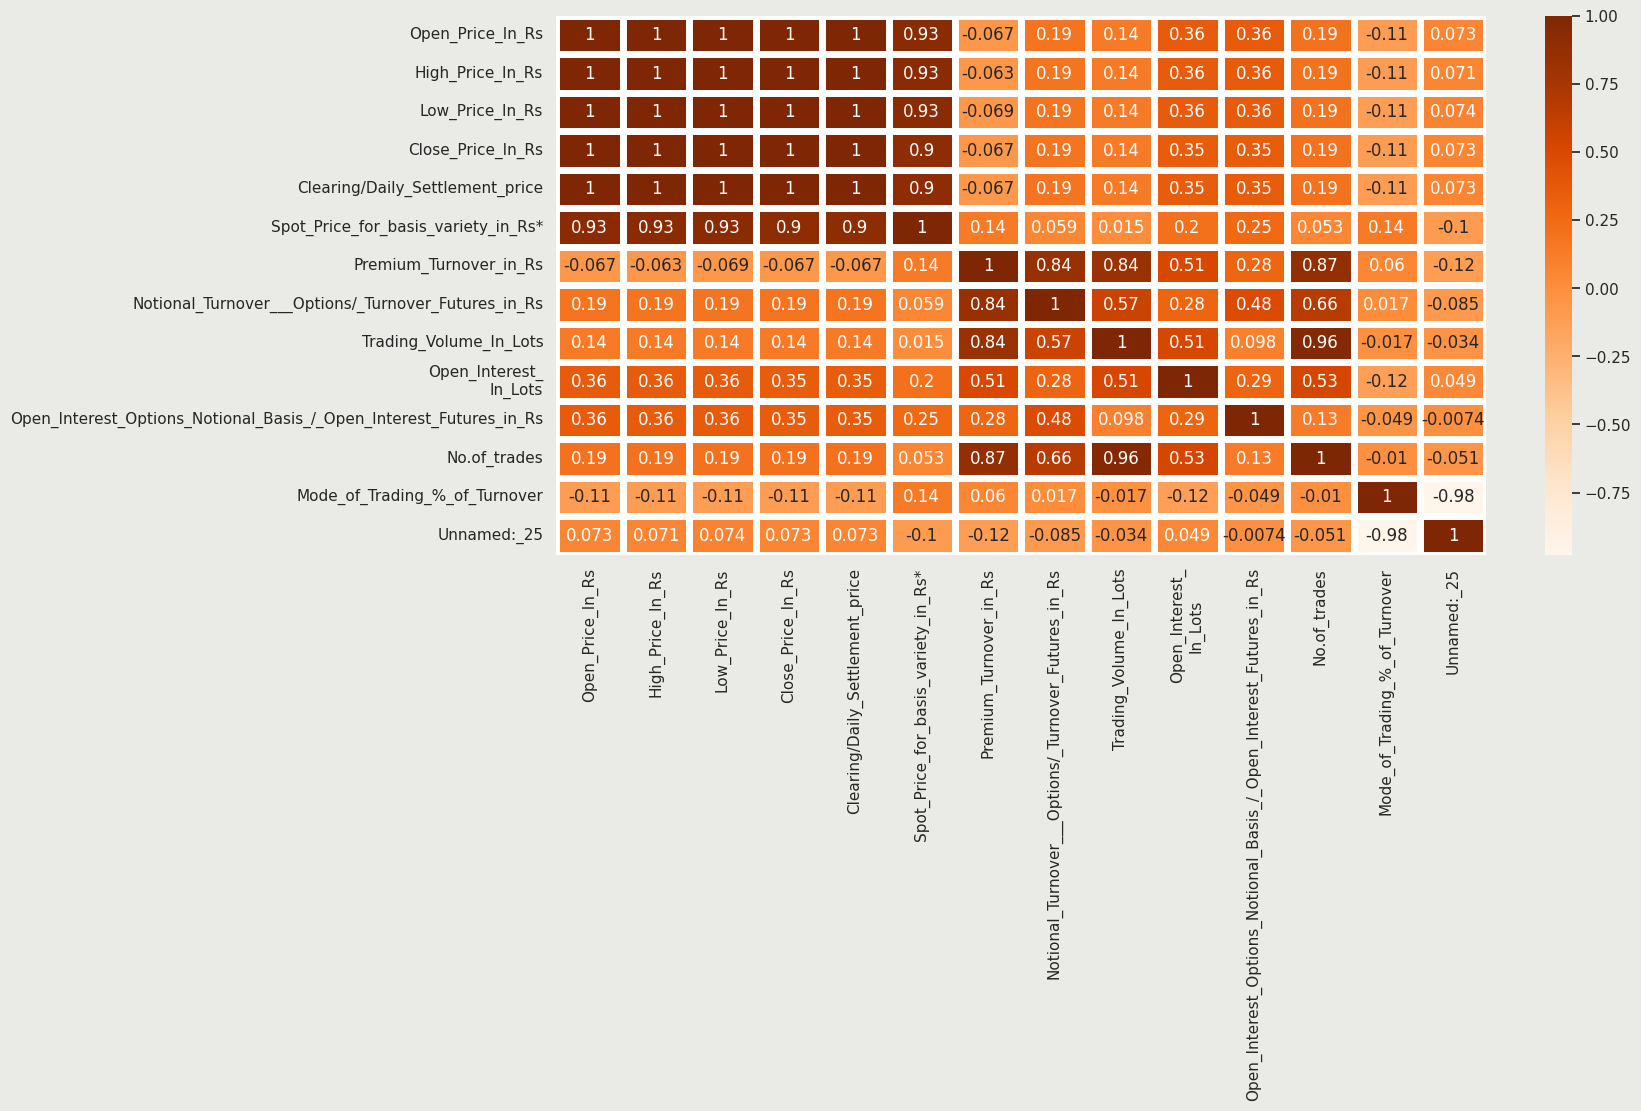

In [22]:
 plt.figure(figsize = [15, 7], clear = True, facecolor = '#EAEAE6')
 sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
             linecolor = "white", cmap = "Oranges");

In [23]:
df['Trading_Volume_In_Lots'].isnull().sum()

97671

In [24]:
df.dropna(subset=['Trading_Volume_In_Lots','Open_Price_In_Rs'], inplace=True)
df

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
3,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-04-30 00:00:00,1 KGS,0,...,181.15,NaN,2.205104e+09,2479.0,1475.0,5 MT,1.313856e+09,2309.0,40.803507,59.196493
4,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-05-31 00:00:00,1 KGS,0,...,181.15,NaN,2.838950e+07,32.0,45.0,5 MT,4.002750e+07,31.0,34.382870,65.617130
5,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-04-30 00:00:00,1 KGS,0,...,677.60,NaN,1.527776e+10,9165.0,2717.0,2500 KGS,4.546900e+09,8445.0,39.450045,60.549955
6,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-05-31 00:00:00,1 KGS,0,...,677.60,NaN,2.369736e+08,142.0,102.0,2500 KGS,1.708245e+08,137.0,39.802979,60.197021
10,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COTTON,COTTON,2021-04-30 00:00:00,1 BALES,0,...,21690.00,NaN,8.299610e+08,1550.0,7660.0,25 BALES,4.071290e+09,888.0,8.310180,91.689820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.000000e+00,0.0,0.0,0,0.000000e+00,0.0,0.000000,0.000000
5647,Note:,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.000000e+00,0.0,0.0,0,0.000000e+00,0.0,0.000000,0.000000
5648,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.000000e+00,0.0,0.0,0,0.000000e+00,0.0,0.000000,0.000000
5649,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.000000e+00,0.0,0.0,0,0.000000e+00,0.0,0.000000,0.000000


In [25]:
df.dropna(subset=['Trading_Volume_In_Lots','Open_Price_In_Rs'], inplace=True)
df

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
3,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-04-30 00:00:00,1 KGS,0,...,181.15,NaN,2.205104e+09,2479.0,1475.0,5 MT,1.313856e+09,2309.0,40.803507,59.196493
4,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2021-05-31 00:00:00,1 KGS,0,...,181.15,NaN,2.838950e+07,32.0,45.0,5 MT,4.002750e+07,31.0,34.382870,65.617130
5,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-04-30 00:00:00,1 KGS,0,...,677.60,NaN,1.527776e+10,9165.0,2717.0,2500 KGS,4.546900e+09,8445.0,39.450045,60.549955
6,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COPPER,COPPER,2021-05-31 00:00:00,1 KGS,0,...,677.60,NaN,2.369736e+08,142.0,102.0,2500 KGS,1.708245e+08,137.0,39.802979,60.197021
10,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,COTTON,COTTON,2021-04-30 00:00:00,1 BALES,0,...,21690.00,NaN,8.299610e+08,1550.0,7660.0,25 BALES,4.071290e+09,888.0,8.310180,91.689820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.000000e+00,0.0,0.0,0,0.000000e+00,0.0,0.000000,0.000000
5647,Note:,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.000000e+00,0.0,0.0,0,0.000000e+00,0.0,0.000000,0.000000
5648,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.000000e+00,0.0,0.0,0,0.000000e+00,0.0,0.000000,0.000000
5649,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.000000e+00,0.0,0.0,0,0.000000e+00,0.0,0.000000,0.000000


In [26]:
list(df.columns)

['Year',
 'Month',
 'Date',
 'Derivative_segment',
 'Instrument_Type',
 'Name_of_the_commodity',
 'Symbol',
 'Expiry_Date',
 'Price_unit',
 'Option_Type',
 'Strike_Price_In_Rs',
 'Open_Price_In_Rs',
 'High_Price_In_Rs',
 'Low_Price_In_Rs',
 'Close_Price_In_Rs',
 'Clearing/Daily_Settlement_price',
 'Spot_Price_for_basis_variety_in_Rs*',
 'Premium_Turnover_in_Rs',
 'Notional_Turnover___Options/_Turnover_Futures_in_Rs',
 'Trading_Volume_In_Lots',
 'Open_Interest_\nIn_Lots',
 'Lot_size_and_unit',
 'Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs',
 'No.of_trades',
 'Mode_of_Trading_%_of_Turnover',
 'Unnamed:_25']

In [49]:
df1 = df[(df['Name_of_the_commodity'] == 'SILVER')]
df1

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
109,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2021-05-05 00:00:00,1 KGS,0,...,63713.0,NaN,2.798306e+10,14508.0,10112.0,30 KGS,1.974540e+10,12413.0,46.050229,53.949771
110,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2021-07-05 00:00:00,1 KGS,0,...,63713.0,NaN,6.768270e+08,345.0,898.0,30 KGS,1.777393e+09,339.0,52.181252,47.818748
111,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-04-26 00:00:00,1 KGS,CE,...,NaN,292980.0,3.892980e+06,2.0,5.0,30 KGS,9.732450e+06,2.0,50.000000,50.000000
113,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-04-26 00:00:00,1 KGS,CE,...,NaN,211890.0,3.931890e+06,2.0,5.0,30 KGS,9.829725e+06,1.0,50.000000,50.000000
114,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-04-26 00:00:00,1 KGS,CE,...,NaN,1030200.0,2.938020e+07,15.0,6.0,30 KGS,1.175211e+07,10.0,50.000000,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,2018,August,2018-08-31 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2018-11-28 00:00:00,1 KGS,PE,...,NaN,21150.0,3.261150e+06,3.0,8.0,30 KGS,8.696400e+06,3.0,NaN,100.000000
5606,2018,August,2018-08-31 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2018-11-28 00:00:00,1 KGS,PE,...,NaN,7860.0,1.102860e+06,1.0,2.0,30 KGS,2.205720e+06,1.0,50.000000,50.000000
5607,2018,August,2018-08-31 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2018-11-28 00:00:00,1 KGS,PE,...,NaN,306285.0,2.139628e+07,19.0,38.0,30 KGS,4.281840e+07,16.0,47.366307,52.633693
5608,2018,August,2018-08-31 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2018-11-28 00:00:00,1 KGS,PE,...,NaN,290625.0,1.491562e+07,13.0,40.0,30 KGS,4.589400e+07,10.0,50.000000,50.000000


In [50]:
df2 = df1.drop_duplicates(subset='Month')
df2


,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
109,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2021-05-05 00:00:00,1 KGS,0,...,63713.0,NaN,2.798306e+10,14508.0,10112.0,30 KGS,1.974540e+10,12413.0,46.050229,53.949771
134,2021,August,2021-08-02 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2021-09-03 00:00:00,1 KGS,0,...,67871.0,NaN,1.814461e+10,8919.0,8473.0,30 KGS,1.725670e+10,7723.0,50.937682,49.062318
201,2019,Sep,2019-09-02 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2019-09-05 00:00:00,1 KGS,0,...,NaN,NaN,1.876086e+09,1322.0,702.0,30 KGS,1.000118e+09,785.0,22.780405,77.219595
201,2022,February,2022-02-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2022-03-04 00:00:00,1 KGS,0,...,61359.0,NaN,2.993114e+10,16207.0,13258.0,30 KGS,2.440453e+10,13238.0,51.867185,48.132815
155,2020,May,2020-05-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2020-05-05 00:00:00,1 KGS,0,...,NaN,NaN,3.117263e+08,252.0,543.0,30 KGS,6.717507e+08,135.0,18.642878,81.357122
122,2021,March,2021-03-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2021-03-05 00:00:00,1 KGS,0,...,68374.0,NaN,5.480073e+09,2684.0,3158.0,30 KGS,6.387560e+09,2131.0,31.691609,68.308391
104,2018,January,2018-01-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2018-03-05 00:00:00,1 KGS,0,...,38715.0,NaN,2.072282e+09,1763.0,17287.0,30 KGS,2.031707e+10,1381.0,7.288242,92.711758
155,2019,Oct,2019-10-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2019-11-27 00:00:00,1 KGS,CE,...,NaN,196050.0,2.716050e+06,2.0,5.0,30 KGS,6.790125e+06,2.0,50.000000,50.000000
196,2022,June,2022-06-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2022-07-05 00:00:00,1 KGS,0,...,60508.0,NaN,3.005373e+10,16393.0,13184.0,30 KGS,2.435612e+10,13481.0,48.104252,51.895748
192,2019,Jul,2019-07-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2019-07-05 00:00:00,1 KGS,0,...,37391.0,NaN,5.165434e+09,4644.0,2564.0,30 KGS,2.817964e+09,3647.0,32.231621,67.768379


<Axes: xlabel='Month'>

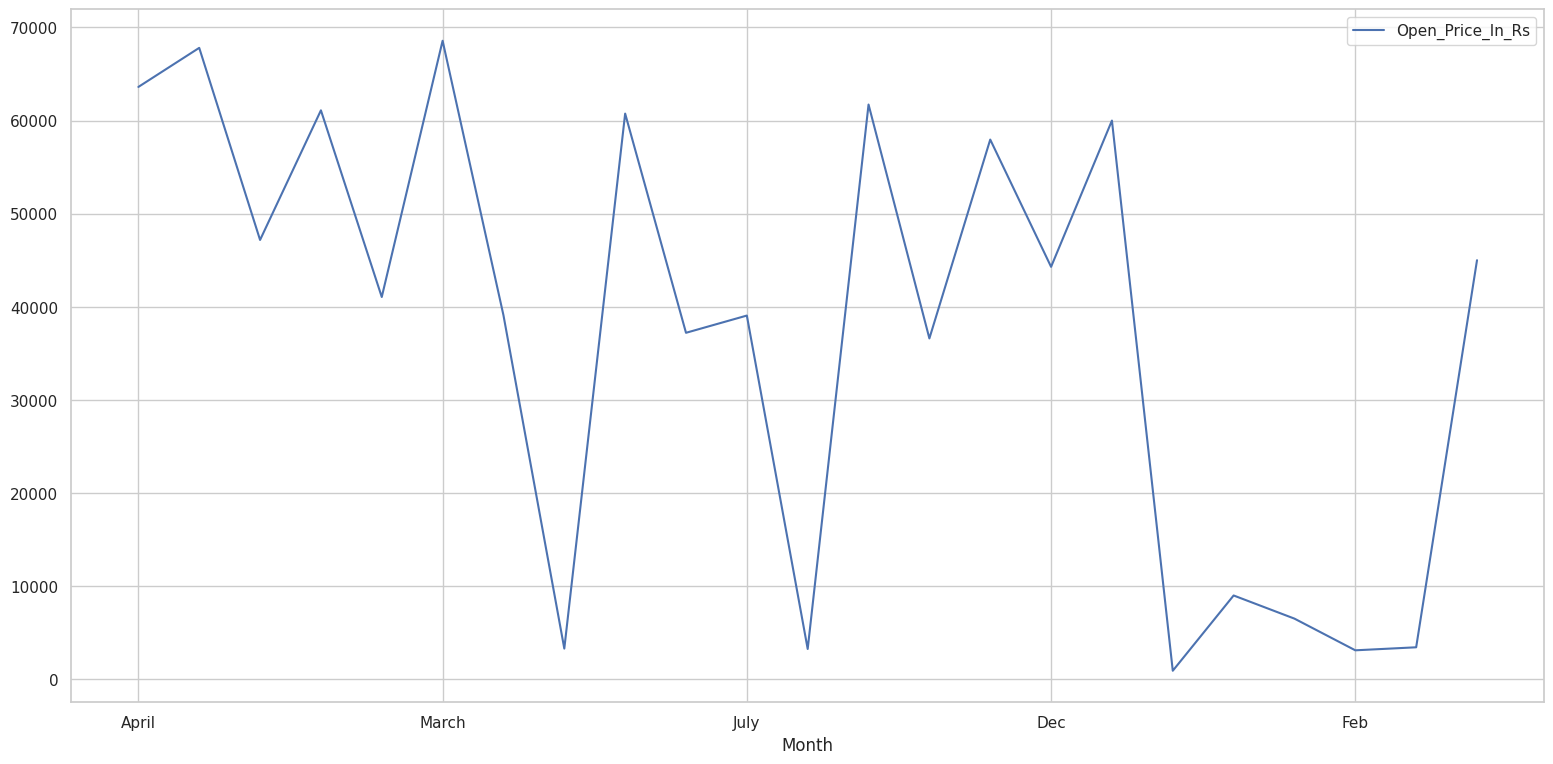

In [51]:


#df1.plot(x="Month", y=["Open_Price_In_Rs", "Close_Price_In_Rs"], kind="bar", figsize=(25, 10))
df2.plot(x="Month", y=["Open_Price_In_Rs"], kind="line", figsize=(19, 9))
# sns.lineplot(ax = axes[1], x = df["date"], y = df["high"]);
# sns.lineplot(ax = axes[2], x = df["date"], y = df["low"]);
#sns.lineplot(ax = axes[0], x = df["Date"], y = df["Close_Price_In_Rs"]);
# sns.lineplot(ax = axes[4], x = df["date"], y = df["volume"]);

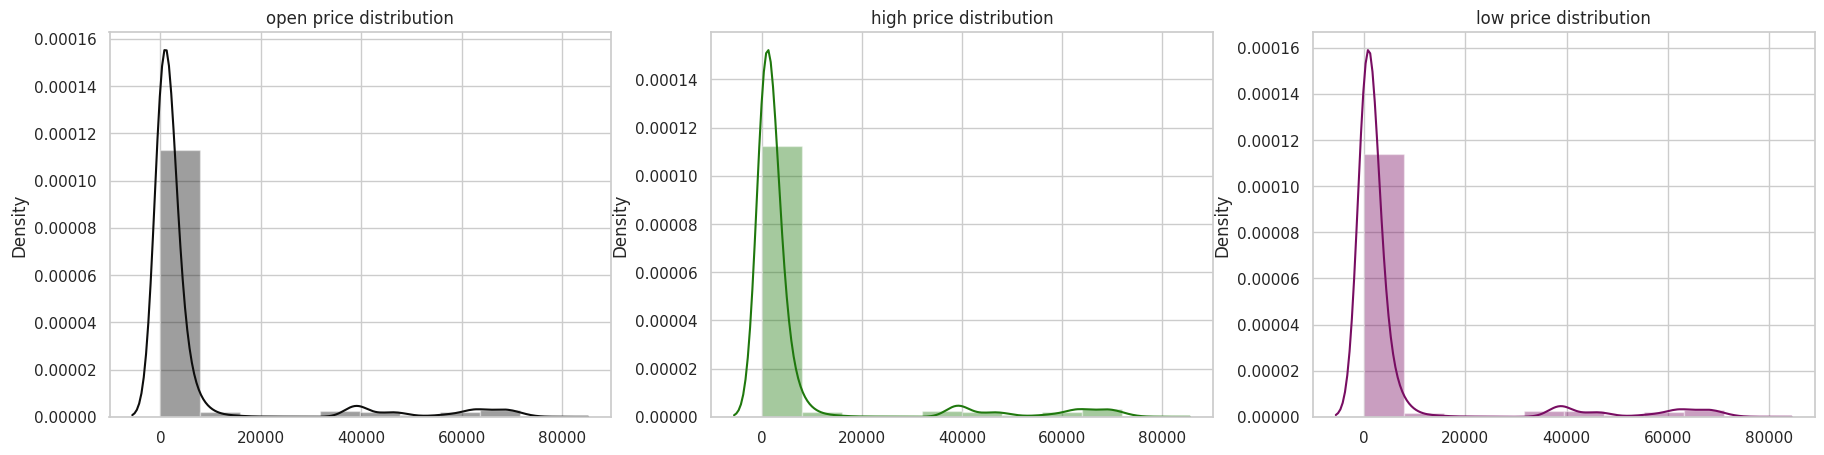

In [52]:
fig, axes = plt.subplots(1, 3, figsize = (22, 5))

sns.distplot(ax = axes[0], x = df1["Open_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0E0E0D").set(title = "open price distribution");

sns.distplot(ax = axes[1], x = df1["High_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#1F780D").set(title = "high price distribution");

sns.distplot(ax = axes[2], x = df1["Low_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#780D62").set(title = "low price distribution");

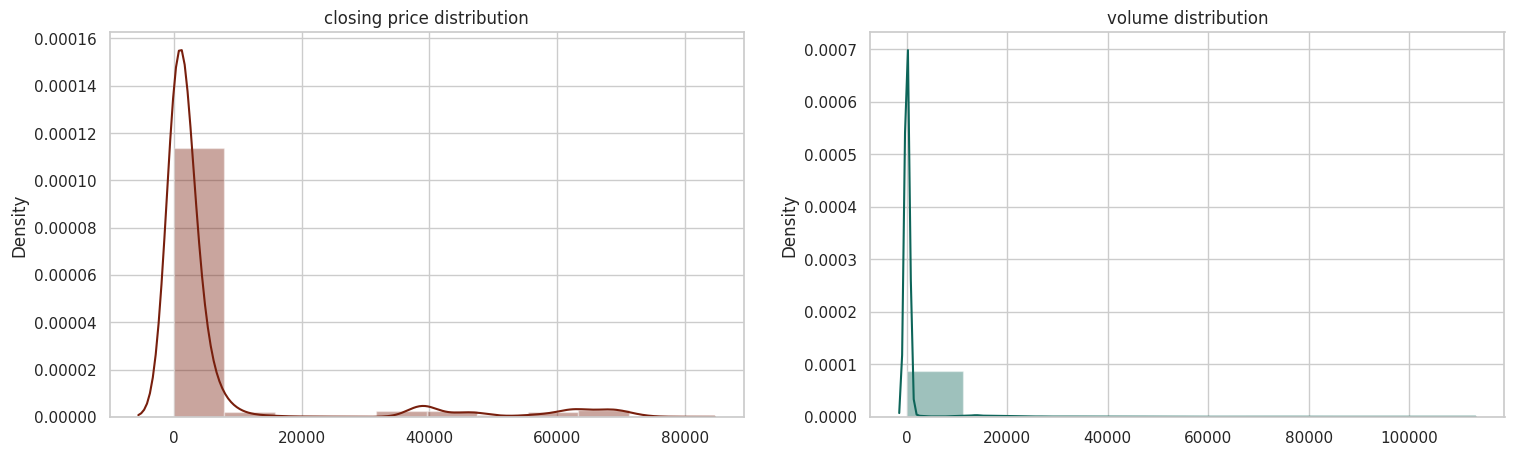

In [53]:
fig, axes = plt.subplots(1, 2, figsize = (18, 5))

sns.distplot(ax = axes[0], x = df1["Close_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#781F0D").set(title = "closing price distribution");

sns.distplot(ax = axes[1], x = df1["Trading_Volume_In_Lots"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0D6559").set(title = "volume distribution");

In [54]:
fig = px.histogram(df, x = "Close_Price_In_Rs", y = "Trading_Volume_In_Lots", marginal = "box", text_auto = True, template = "plotly_dark", hover_data  = df1.columns)
fig.show()

In [68]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [69]:
X = df1[['High_Price_In_Rs','Low_Price_In_Rs','Close_Price_In_Rs']]
Y = df1['Open_Price_In_Rs']
print(X)
print(Y)

      High_Price_In_Rs  Low_Price_In_Rs  Close_Price_In_Rs
109            65155.0          63512.0            65089.0
110            66045.0          64440.0            65976.0
111             5555.0           4211.0             4883.0
113             3531.5           3531.5             3531.5
114             2666.0           2025.0             2289.5
...                ...              ...                ...
5605             240.0            225.0              235.0
5606             262.0            262.0              262.0
5607             617.0            493.0              560.0
5608             803.0            657.5              745.0
5609            1113.0            900.0              957.0

[35772 rows x 3 columns]
109     63614.0
110     64440.0
111      4211.0
113      3531.5
114      2030.0
         ...   
5605      225.0
5606      262.0
5607      547.5
5608      664.5
5609      998.0
Name: Open_Price_In_Rs, Length: 35772, dtype: float64


In [70]:
df1

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
109,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2021-05-05 00:00:00,1 KGS,0,...,63713.0,NaN,2.798306e+10,14508.0,10112.0,30 KGS,1.974540e+10,12413.0,46.050229,53.949771
110,2021,April,2021-04-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2021-07-05 00:00:00,1 KGS,0,...,63713.0,NaN,6.768270e+08,345.0,898.0,30 KGS,1.777393e+09,339.0,52.181252,47.818748
111,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-04-26 00:00:00,1 KGS,CE,...,NaN,292980.0,3.892980e+06,2.0,5.0,30 KGS,9.732450e+06,2.0,50.000000,50.000000
113,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-04-26 00:00:00,1 KGS,CE,...,NaN,211890.0,3.931890e+06,2.0,5.0,30 KGS,9.829725e+06,1.0,50.000000,50.000000
114,2021,April,2021-04-01 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2021-04-26 00:00:00,1 KGS,CE,...,NaN,1030200.0,2.938020e+07,15.0,6.0,30 KGS,1.175211e+07,10.0,50.000000,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,2018,August,2018-08-31 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2018-11-28 00:00:00,1 KGS,PE,...,NaN,21150.0,3.261150e+06,3.0,8.0,30 KGS,8.696400e+06,3.0,NaN,100.000000
5606,2018,August,2018-08-31 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2018-11-28 00:00:00,1 KGS,PE,...,NaN,7860.0,1.102860e+06,1.0,2.0,30 KGS,2.205720e+06,1.0,50.000000,50.000000
5607,2018,August,2018-08-31 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2018-11-28 00:00:00,1 KGS,PE,...,NaN,306285.0,2.139628e+07,19.0,38.0,30 KGS,4.281840e+07,16.0,47.366307,52.633693
5608,2018,August,2018-08-31 00:00:00,Commodity Derivatives,OPTFUT,SILVER,SILVER,2018-11-28 00:00:00,1 KGS,PE,...,NaN,290625.0,1.491562e+07,13.0,40.0,30 KGS,4.589400e+07,10.0,50.000000,50.000000


In [71]:
df1.shape

(35772, 26)

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
X_train
Y_train


436     1872.5
1070    2943.0
6858    1550.0
1414     320.0
2692    1405.5
         ...  
5819    2500.0
4301       4.0
4066     609.0
397       98.0
3487    2864.0
Name: Open_Price_In_Rs, Length: 28617, dtype: float64

In [73]:
X_test.shape

(7155, 3)

In [74]:
model_trainer = RandomForestRegressor(n_estimators=150)
model_trainer.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=150)

In [75]:
test_data_prediction = model_trainer.predict(X_test)

In [76]:
Y_test = list(Y_test)


In [77]:
print(Y_test)

[920.0, 2575.5, 3534.0, 2620.5, 815.0, 2504.0, 900.0, 7954.0, 3344.5, 590.0, 2621.5, 9426.5, 3633.0, 23.0, 2718.0, 10.0, 3056.0, 1012.5, 52.5, 830.0, 2993.0, 1228.5, 652.0, 565.5, 32.0, 1550.0, 350.0, 601.0, 2879.5, 5871.0, 4011.5, 1809.5, 66135.0, 10.0, 70659.0, 168.0, 1908.5, 282.0, 2945.5, 3882.5, 5365.0, 350.0, 599.5, 56392.0, 66927.0, 200.0, 3404.0, 333.5, 185.0, 65.0, 38000.0, 690.0, 146.5, 848.0, 7285.5, 68048.0, 637.0, 1223.0, 2721.5, 2900.0, 2375.0, 0.5, 1440.0, 35.0, 3.0, 1346.0, 3705.5, 93.5, 500.0, 1633.0, 500.0, 1050.0, 6.0, 3640.0, 70500.0, 349.5, 1540.0, 61050.0, 447.0, 693.5, 2281.0, 5.0, 281.0, 1077.0, 5429.0, 110.5, 2.5, 2741.0, 55.0, 3000.0, 80.0, 950.0, 1390.0, 9260.0, 2324.0, 339.0, 25.5, 749.0, 820.5, 41050.0, 692.0, 2653.0, 960.0, 59109.0, 345.5, 2.0, 1286.0, 1898.0, 1314.5, 96.0, 729.0, 261.0, 450.0, 1690.0, 817.5, 159.0, 1950.0, 978.0, 955.0, 1309.0, 1800.0, 2452.0, 3650.0, 150.5, 47799.0, 405.0, 663.5, 403.5, 2011.5, 70.0, 1884.5, 1421.5, 2050.0, 1249.0, 1821.

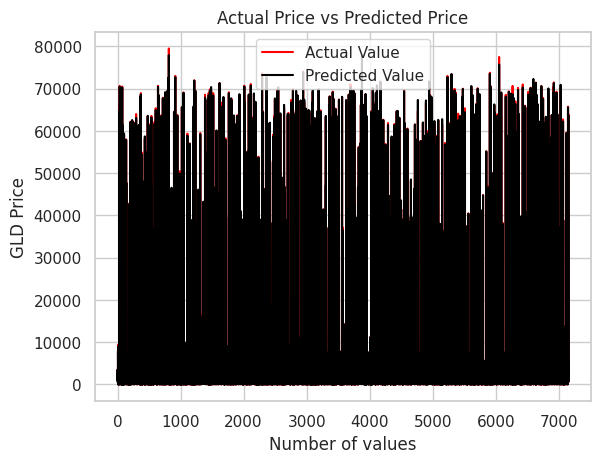

In [78]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [79]:

Y_test = np.array(Y_test)
test_data_prediction = np.array(test_data_prediction)

Y_test = np.reshape(Y_test, (-1, 1))
test_data_prediction = np.reshape(test_data_prediction, (-1, 1))
model_trainer.score(X_train, Y_train)

0.9999703871574724

In [80]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

rmse = np.sqrt(np.mean(((test_data_prediction - Y_test) ** 2)))
print("RMSE score of the model:", rmse)

R squared error :  0.9997725701297729
RMSE score of the model: 227.78383631050824


In [48]:
# Among all the models that we have used Random forest has given us the best possible result
# So, now we will apply hyperperameter tuning to check weather it's accuracy can be improved further or not.

from sklearn.model_selection import GridSearchCV


param_grid = {
'n_estimators': [80, 100, 150],
'max_depth': [30,35,40],
'min_samples_split': [1,2,5],
'min_samples_leaf': [1,2,4]
}
from joblib import parallel_backend

with parallel_backend('threading', n_jobs=10):

    rf = RandomForestRegressor()
    rf_tuned = GridSearchCV(rf, param_grid, cv=5)
    rf_tuned.fit(X_train, Y_train)
    best_params = rf_tuned.best_params_
    print(f"Best Parameters: {best_params}")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


rf_tuned = RandomForestRegressor(**best_params)
rf_tuned.fit(X_train, Y_train)
Y_pred = rf_tuned.predict(X_test)
r2 = metrics.r2_score(Y_test, Y_pred)
print(f"Tuned Random Forest:")
print(f"R squared value: {r2}")

KeyboardInterrupt: ignored

In [81]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('projectname.pickle')
print(projectabspathname)
projectname = 'projectname.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(model_trainer, projectpickle)
projectpickle.close()

/content/projectname.pickle


In [86]:
pickle.dump(model_trainer,open('/content/sample_data/silver.pkl','wb'))

In [88]:
x=pickle.load(open('/content/sample_data/silver.pkl','rb'))

In [90]:
x.predict([[33080,37800,39800]])

array([37269.18])

RMSE Score for train dataset


Linear Regressions 



In [92]:
# Model training: Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() 
lr_model.fit(X_train,Y_train)
lr_pred = lr_model.predict(X_test)
error_score = metrics.r2_score(Y_test,lr_pred)
print("R squared score for Linear regression is : ", error_score)

R squared score for Linear regression is :  0.9998272628368318


In [98]:
# Model training: Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,Y_train)
dt_pred = dt_model.predict(X_test)
error_score = metrics.r2_score(Y_test,dt_pred)
print("R squared score for Decision tree is : ", error_score)

R squared score for Decision tree is :  0.9995852354196484


In [100]:
# Model training: KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train,Y_train)
knn_pred = knn_model.predict(X_test)
error_score = metrics.r2_score(Y_test,knn_pred)
print("R squared score for KNN is : ", error_score)

R squared score for KNN is :  0.9997845221676485


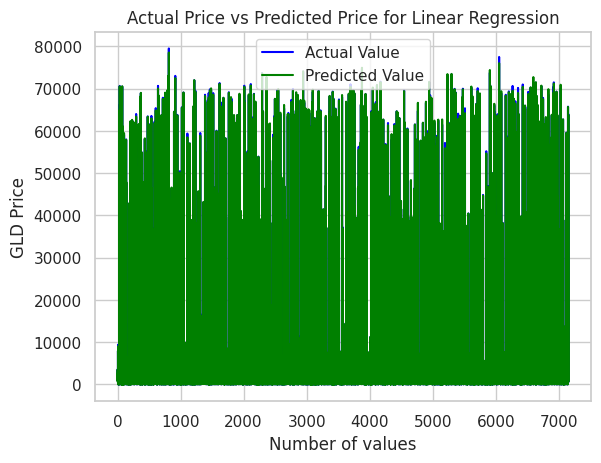

In [102]:
# Actual and predicted values plot for Linear Regression
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(lr_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for Linear Regression')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

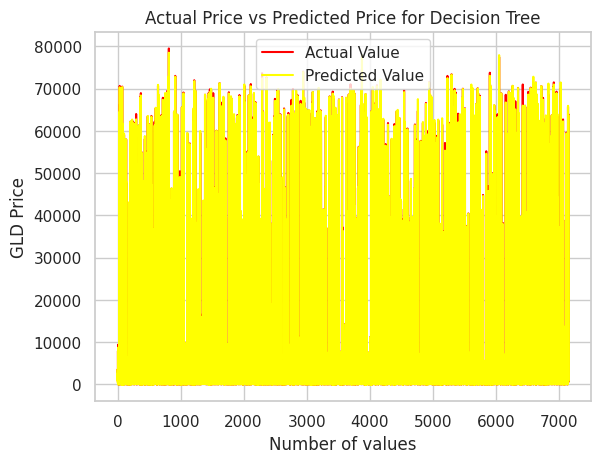

In [103]:

# Actual and predicted values plot for Decision Tree
Y_test = list(Y_test)
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(dt_pred, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for Decision Tree')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

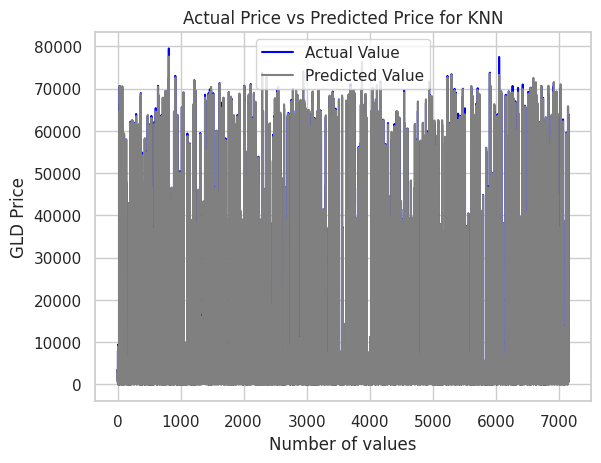

In [104]:
# Actual and predicted values plot for KNN
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(knn_pred, color='grey', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for KNN')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

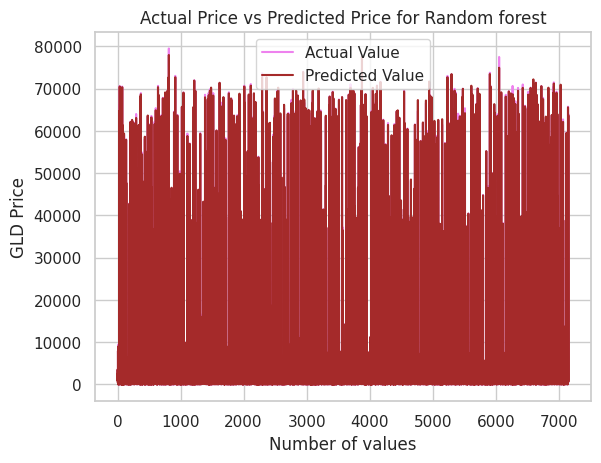

In [105]:
# Actual and predicted values plot for Random forest
Y_test = list(Y_test)
plt.plot(Y_test, color='violet', label = 'Actual Value')
plt.plot(rf_pred, color='brown', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for Random forest')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()